In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Use Relevant Cols

In [2]:
df = pd.read_csv('../../../data/processed_data/full_df.csv')
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,April Average Precipitation,May Average Precipitation,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC
0,1,1,1001,AL,Autauga County,2010,1.0,9778.1,670.0,137881.0,...,2.17,5.72,2.47,3.38,4.38,1.38,3.14,5.01,1.89,2.0
1,1,3,1003,AL,Baldwin County,2010,1.0,8221.7,2148.0,449589.0,...,2.31,6.31,4.94,4.08,9.38,2.24,2.06,6.11,2.19,3.0
2,1,9,1009,AL,Blount County,2010,1.0,8929.7,787.0,155580.0,...,5.66,7.47,3.39,3.55,4.31,1.23,3.12,4.62,2.07,1.0
3,1,15,1015,AL,Calhoun County,2010,1.0,11526.2,2035.0,313874.0,...,3.73,6.46,2.70,4.00,3.78,1.55,2.96,3.06,2.24,3.0
4,1,31,1031,AL,Coffee County,2010,1.0,9004.7,645.0,126516.0,...,1.88,4.71,3.84,2.78,6.30,2.41,1.38,3.71,2.03,4.0


In [3]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
with open("../Regression Analysis/factors.txt") as f:
     factors = f.read().splitlines()
with open("../Regression Analysis/outcomes.txt") as f:
     outcomes = f.read().splitlines()
df = df[identifying_fields + factors + outcomes]
print(df.shape[0])
df.dropna(inplace=True)
print(df.shape[0])
df.head()

6280
4492


,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Mental health providers raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,...,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate
844,AL,Autauga County,2011,0.740,0.089,0.554,0.000020,50354.0,51622.0,64.658333,...,3.39,4.38,1.75,4.46,0.98,4.63,3.96,2.0,4.1,21.7
845,AL,Baldwin County,2011,0.681,0.088,0.615,0.000165,6076.0,51957.0,67.733333,...,3.15,8.73,2.05,9.89,0.15,3.22,2.78,3.0,4.1,18.2
846,AL,Calhoun County,2011,0.689,0.101,0.499,0.000106,9452.0,39997.0,62.325000,...,4.53,3.83,0.93,6.85,0.90,5.00,4.86,3.0,4.8,14.4
847,AL,Cherokee County,2011,0.661,0.107,0.401,0.000000,-24413.0,38028.0,61.766667,...,3.81,4.66,1.86,8.76,1.10,5.78,5.82,6.0,4.4,38.4
848,AL,Cullman County,2011,0.684,0.094,0.460,0.000049,20380.0,39276.0,61.333333,...,3.76,5.03,1.51,10.39,0.75,5.95,6.09,4.0,4.8,17.4


## Step 2: Identify Col needed

In [9]:
treatment = 'Median household income raw value'

In [10]:
avg_temp = df[treatment].mean()
print(avg_temp)

51159.472617987536


In [11]:
med_temp = df[treatment].median()
print(med_temp)

48194.5


In [12]:
AVG = False
temp_threshold = avg_temp if AVG else med_temp

In [13]:
def classify_temp_treatment(row):
    return 1 if row['Median household income raw value'] >= temp_threshold else 0

In [14]:
categorize_treatment = 'income_treated'

In [15]:
df[categorize_treatment] = df.apply(classify_temp_treatment, axis=1)
df.head()

,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Mental health providers raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,income_treated
844,AL,Autauga County,2011,0.740,0.089,0.554,0.000020,50354.0,51622.0,64.658333,...,4.38,1.75,4.46,0.98,4.63,3.96,2.0,4.1,21.7,1
845,AL,Baldwin County,2011,0.681,0.088,0.615,0.000165,6076.0,51957.0,67.733333,...,8.73,2.05,9.89,0.15,3.22,2.78,3.0,4.1,18.2,1
846,AL,Calhoun County,2011,0.689,0.101,0.499,0.000106,9452.0,39997.0,62.325000,...,3.83,0.93,6.85,0.90,5.00,4.86,3.0,4.8,14.4,0
847,AL,Cherokee County,2011,0.661,0.107,0.401,0.000000,-24413.0,38028.0,61.766667,...,4.66,1.86,8.76,1.10,5.78,5.82,6.0,4.4,38.4,0
848,AL,Cullman County,2011,0.684,0.094,0.460,0.000049,20380.0,39276.0,61.333333,...,5.03,1.51,10.39,0.75,5.95,6.09,4.0,4.8,17.4,0


In [17]:
df[df[categorize_treatment]==0].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Mental health providers raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,February Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,income_treated
count,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,...,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.0
mean,2013.385574,0.784497,0.089750,0.550585,0.000753,5343.782321,41663.410062,57.886535,37.206500,39.543143,...,4.113695,3.863731,3.708023,3.179359,3.170338,4.336153,3.172752,3.867631,19.201736,0.0
std,1.826810,0.096076,0.028086,0.085103,0.000989,12655.751826,4102.589127,8.076626,11.382702,12.160923,...,2.789690,2.925191,2.559362,2.693423,2.815001,3.336555,1.560505,0.659195,8.165495,0.0
min,2011.000000,0.185000,0.035655,0.307826,0.000000,-85616.000000,27268.000000,26.541667,-12.800000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.900000,4.400000,0.0
25%,2012.000000,0.726051,0.070445,0.491610,0.000128,888.803072,39080.750000,51.418750,28.800000,31.200000,...,2.132500,1.940000,1.870000,1.360000,1.140000,2.060000,2.000000,3.400000,13.600000,0.0
50%,2013.000000,0.794000,0.085000,0.550976,0.000350,2675.500000,41998.500000,58.129167,37.300000,40.100000,...,3.795000,3.370000,3.370000,2.680000,2.450000,3.850000,3.000000,3.800000,17.800000,0.0
75%,2015.000000,0.855020,0.104000,0.608748,0.001043,7378.933333,44907.500000,63.441667,44.400000,47.500000,...,5.600000,5.067500,5.060000,4.240000,4.117500,5.690000,4.000000,4.300000,22.900000,0.0
max,2016.000000,1.000000,0.297000,0.875390,0.013656,89701.000000,48194.000000,78.383333,72.000000,71.600000,...,18.470000,22.370000,18.980000,25.720000,20.580000,34.330000,9.000000,7.000000,98.500000,0.0


In [18]:
df[df[categorize_treatment]==1].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Mental health providers raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,February Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,income_treated
count,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.00000,...,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.0
mean,2013.560997,0.832261,0.073574,0.651071,0.001002,3884.313509,60655.535174,55.101417,33.285797,35.47618,...,3.576710,3.694288,3.540472,3.351046,2.830525,3.762738,1.902939,3.287801,15.195592,1.0
std,1.902190,0.078953,0.022782,0.087486,0.001112,10077.943320,11922.158486,8.003240,11.598539,12.74995,...,2.336356,3.038971,2.586809,2.670807,2.397291,2.736033,1.227531,0.519416,6.319354,0.0
min,2011.000000,0.266667,0.017000,0.364774,0.000000,-99281.000000,48195.000000,24.250000,-20.000000,-0.50000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.800000,4.300000,1.0
25%,2012.000000,0.787000,0.057892,0.593000,0.000241,720.044765,51911.500000,49.435417,25.100000,26.80000,...,1.980000,1.710000,1.730000,1.520000,1.240000,1.842500,1.000000,2.900000,11.100000,1.0
50%,2013.000000,0.842000,0.070994,0.653129,0.000617,1599.062377,56601.500000,54.054167,31.600000,34.60000,...,3.385000,3.220000,3.140000,2.955000,2.325000,3.450000,1.000000,3.300000,14.000000,1.0
75%,2015.000000,0.890000,0.086000,0.711649,0.001367,4096.235714,66150.750000,60.395833,40.900000,44.50000,...,4.940000,4.790000,4.887500,4.317500,3.610000,4.860000,2.000000,3.600000,18.000000,1.0
max,2016.000000,1.000000,0.188000,0.883019,0.007797,106755.000000,122641.000000,78.566667,72.500000,72.00000,...,15.570000,22.950000,20.790000,27.260000,24.650000,23.920000,7.000000,5.900000,64.100000,1.0


<AxesSubplot:xlabel='High school graduation raw value', ylabel='Count'>

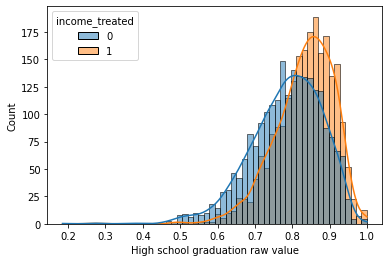

In [21]:
sns.histplot(data=df, x="High school graduation raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Some college raw value', ylabel='Count'>

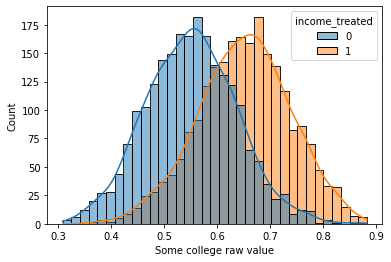

In [24]:
sns.histplot(data=df, x="Some college raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Unemployment raw value', ylabel='Count'>

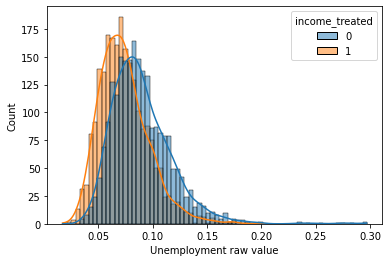

In [46]:
sns.histplot(data=df, x="Unemployment raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Median household income raw value', ylabel='Count'>

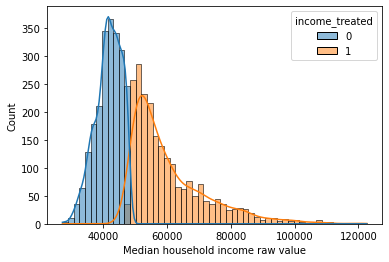

In [23]:
sns.histplot(data=df, x="Median household income raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Poor mental health days raw value', ylabel='Count'>

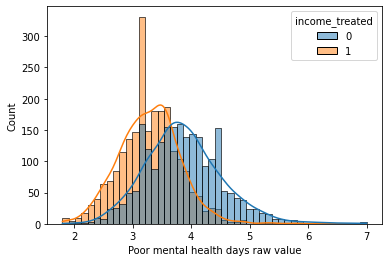

In [26]:
sns.histplot(data=df, x="Poor mental health days raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Crude Rate', ylabel='Count'>

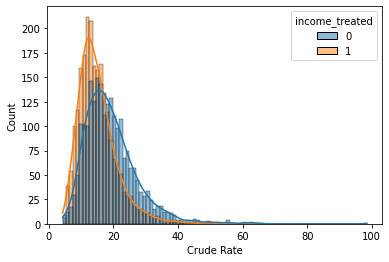

In [28]:
sns.histplot(data=df, x="Crude Rate", hue=categorize_treatment, kde=True)

In [29]:
df[categorize_treatment].value_counts()

1    2246
0    2246
Name: income_treated, dtype: int64

# Unadjusted ATE

In [39]:
# As a comparison measure
print(df['Poor mental health days raw value'].describe())
print()
print(df['Crude Rate'].describe())

count    4492.000000
mean        3.577716
std         0.660422
min         1.800000
25%         3.100000
50%         3.500000
75%         4.000000
max         7.000000
Name: Poor mental health days raw value, dtype: float64

count    4492.000000
mean       17.198664
std         7.570079
min         4.300000
25%        12.000000
50%        15.700000
75%        20.600000
max        98.500000
Name: Crude Rate, dtype: float64


In [36]:
# Unadjusted ATE - Poor mental health days
poor_mental_treated = df[df[categorize_treatment]== 1]['Poor mental health days raw value'].mean()
poor_mental_untreated = df[df[categorize_treatment]== 0]['Poor mental health days raw value'].mean()
print("Lower income = {:0.3f}".format(poor_mental_untreated))
print("Higher income = {:0.3f}".format(poor_mental_treated))
print('Difference in Sample Averages = {:0.3f}'.format(poor_mental_treated - poor_mental_untreated))

Lower income = 3.868
Higher income = 3.288
Difference in Sample Averages = -0.580


In [40]:
# Unadjusted ATE - Suicide rate
poor_mental_treated = df[df[categorize_treatment]== 1]['Crude Rate'].mean()
poor_mental_untreated = df[df[categorize_treatment]== 0]['Crude Rate'].mean()
print("Lower income = {:0.3f}".format(poor_mental_untreated))
print("Higher income = {:0.3f}".format(poor_mental_treated))
print('Difference in Sample Averages = {:0.3f}'.format(poor_mental_treated - poor_mental_untreated))

Lower income = 19.202
Higher income = 15.196
Difference in Sample Averages = -4.006


In [41]:
def OLS_estimate(outcome, covariates):
    covariates = sm.add_constant(covariates) # adding a constant 
    model = sm.OLS(outcome, covariates)
    result = model.fit()
    print(result.summary())

In [42]:
OLS_estimate(df['Poor mental health days raw value'], df[categorize_treatment])

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.193
Model:                                           OLS   Adj. R-squared:                  0.193
Method:                                Least Squares   F-statistic:                     1072.
Date:                               Wed, 24 Nov 2021   Prob (F-statistic):          4.62e-211
Time:                                       20:46:19   Log-Likelihood:                -4028.8
No. Observations:                               4492   AIC:                             8062.
Df Residuals:                                   4490   BIC:                             8074.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                     coef    std err          t      P>|t|  

In [43]:
OLS_estimate(df['Crude Rate'], df[categorize_treatment])

                            OLS Regression Results                            
Dep. Variable:             Crude Rate   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     338.1
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           7.31e-73
Time:                        20:46:46   Log-Likelihood:                -15303.
No. Observations:                4492   AIC:                         3.061e+04
Df Residuals:                    4490   BIC:                         3.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.2017      0.154    124.

In [40]:
df.groupby('temp_treated')['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Mental health providers raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC'].agg(['mean'])

C:\Users\alnli\AppData\Local\Temp/ipykernel_18784/2204521667.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('temp_treated')['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Mental health providers raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC'].agg(['mean'])


,Crude Rate,Poor mental health days raw value,High school graduation raw value,Unemployment raw value,Some college raw value,Mental health providers raw value,Ratio of population to mental health providers,Median household income raw value,Average Precipitation,RUCC
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
temp_treated,,,,,,,,,,
0,17.344807,3.464773,0.821078,0.080005,0.623584,0.001001,3324.992372,53414.124205,3.350627,2.671047
1,17.037037,3.702625,0.794334,0.083495,0.575660,0.000741,6039.684121,48665.931552,3.710176,2.390530


Counties that are hotter than average (temp_treated = 1) on average, have a worse ratio of population to mental health providers and lower median household income than counties that are cooler than average.

# Linear Regressions
Q2: What are the estimated ATE specifications?
- 3 specifications should result in similar coefficients for categorize_treatment

In [44]:
# Specification 1
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'High school graduation raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.195
Model:                                           OLS   Adj. R-squared:                  0.194
Method:                                Least Squares   F-statistic:                     542.8
Date:                               Wed, 24 Nov 2021   Prob (F-statistic):          7.39e-212
Time:                                       20:52:43   Log-Likelihood:                -4023.3
No. Observations:                               4492   AIC:                             8053.
Df Residuals:                                   4489   BIC:                             8072.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                                       coef    std err      

In [45]:
# Specification 2
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'Some college raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.281
Model:                                           OLS   Adj. R-squared:                  0.281
Method:                                Least Squares   F-statistic:                     879.2
Date:                               Wed, 24 Nov 2021   Prob (F-statistic):          6.42e-323
Time:                                       20:53:39   Log-Likelihood:                -3767.4
No. Observations:                               4492   AIC:                             7541.
Df Residuals:                                   4489   BIC:                             7560.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                             coef    std err          t     

In [50]:
# Specification 2.5
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'High school graduation raw value', 'Some college raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.281
Model:                                           OLS   Adj. R-squared:                  0.281
Method:                                Least Squares   F-statistic:                     586.1
Date:                               Wed, 24 Nov 2021   Prob (F-statistic):          1.90e-321
Time:                                       21:04:03   Log-Likelihood:                -3767.2
No. Observations:                               4492   AIC:                             7542.
Df Residuals:                                   4488   BIC:                             7568.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                       coef    std err      

In [49]:
# Specification 3
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'Unemployment raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.204
Model:                                           OLS   Adj. R-squared:                  0.204
Method:                                Least Squares   F-statistic:                     576.3
Date:                               Wed, 24 Nov 2021   Prob (F-statistic):          1.66e-223
Time:                                       21:03:12   Log-Likelihood:                -3996.4
No. Observations:                               4492   AIC:                             7999.
Df Residuals:                                   4489   BIC:                             8018.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                             coef    std err          t     

In [48]:
# Specification 4: shouldn't change much
# Real model based on structual causal model
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'Unemployment raw value', 'Mental health providers raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.210
Model:                                           OLS   Adj. R-squared:                  0.209
Method:                                Least Squares   F-statistic:                     397.3
Date:                               Wed, 24 Nov 2021   Prob (F-statistic):          7.24e-229
Time:                                       21:03:06   Log-Likelihood:                -3980.8
No. Observations:                               4492   AIC:                             7970.
Df Residuals:                                   4488   BIC:                             7995.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                        coef    std err     

In [ ]:
real_covariates = ['']

## Propensity Score Matching

Optimization terminated successfully.
         Current function value: 0.688710
         Iterations 4


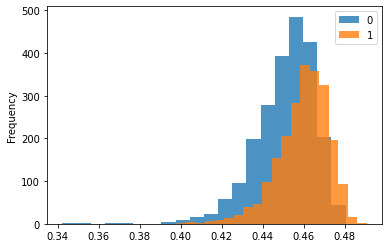

In [52]:
def gen_pscore(data, outcome, covariates):
    model = sm.Logit(outcome, covariates)
    result = model.fit()
    data['pscore'] = result.predict(covariates)
    data.groupby([categorize_treatment]).pscore.plot(kind='hist', bins=20, alpha=0.8, legend=True)

gen_pscore(df, df[categorize_treatment], df['Unemployment raw value'] )

In [54]:
def trim(data):
  control_data = data[data[categorize_treatment] == 0]
  treat_data = data[data[categorize_treatment] == 1]

  min_control, min_treat = control_data.pscore.min(), treat_data.pscore.min()
  max_control, max_treat = control_data.pscore.max(), treat_data.pscore.max()

  min_support = max(min_control, min_treat)
  max_support = min(max_control, max_treat)

  trim_data = data.loc[((data.pscore >= min_support) & (data.pscore <= max_support)),:]
  
  return trim_data

trim_df = trim(df)
trim_df.groupby([categorize_treatment]).pscore.describe()

,count,mean,std,min,25%,50%,75%,max
income_treated,,,,,,,,
0,2231.0,0.451380,0.013709,0.400697,0.443054,0.453390,0.461420,0.480402
1,2206.0,0.459243,0.012137,0.398059,0.452300,0.461033,0.467984,0.480397


### Perform nearest-neighbor matching

In [55]:
def Nearest_Neighbor_Pair(treated_df, non_treated_df):
    treated_x = treated_df['pscore'].values
    non_treated_x = non_treated_df['pscore'].values

    nbrs = NearestNeighbors(n_neighbors=1).fit(np.expand_dims(non_treated_x, axis= 1))
    distances, indices = nbrs.kneighbors(np.expand_dims(treated_x, axis= 1))
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]
    return matched

treated = trim_df[trim_df[categorize_treatment] == 1]
non_treated = trim_df[trim_df[categorize_treatment] == 0]
matched_df = Nearest_Neighbor_Pair(treated, non_treated)
ATE = np.mean(treated['Poor mental health days raw value'].values - matched_df['Poor mental health days raw value'].values)
print('ATE from Nearest Neighbors Matching = {}'.format(round(ATE, 3)))

ATE from Nearest Neighbors Matching = -0.477


### stratification matching

In [58]:
def stratified_matching(data):
  mybins = np.arange(0.0, 1.1, 0.1)
  mylabels = np.arange(1, 11)
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)

  # calculate the weights for each strata
  strata_w = data[data[categorize_treatment] == 1].groupby('strata').size()/data[data[categorize_treatment] == 1].groupby('strata').size().sum()
  
  # calculate the ATT for each strata
  strata_ate = data[data[categorize_treatment] == 1].groupby('strata')['Poor mental health days raw value'].mean() - data[data[categorize_treatment] == 0].groupby('strata')['Poor mental health days raw value'].mean()

  # stratefied matching estimate 
  stratefied_ate = (strata_w * strata_ate).sum()  
  print("The stratification matching estimate is {}".format(round(stratefied_ate, 3))) 
  
stratified_matching(trim_df)

The stratification matching estimate is -0.57


C:\Users\alnli\AppData\Local\Temp/ipykernel_34208/2573337602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)


### Inverse Probability Weighted Matching (IPW)

In [59]:
def IPW_estimator(data, T, Y, P):
  ITT = (data[T] * data[Y])/data[P] - ((1 - data[T])* data[Y])/(1 - data[P])
  IPWE = ITT.mean()
  return IPWE 

round(IPW_estimator(trim_df, categorize_treatment, 'Poor mental health days raw value' , 'pscore'), 3)

0.03